In [96]:
# https://blog.csdn.net/weixin_44615820/article/details/88693275
# https://zhuanlan.zhihu.com/p/37389955
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['font.sans-serif'] = ['simhei']
mpl.rcParams['font.serif'] = ['simhei']
plt.rc("font",family="SimHei",size="14") 
sns.set_style("darkgrid")

# cancer=pd.read_csv("./data/breast-cancer-train.csv")
cancer = pd.read_csv('./data/breast-cancer-train.txt', sep=',')
cancer.columns=['class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
# cancer.head(3)
cancer.tail(5)
# cancer.info()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
137,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
138,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
139,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
140,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no
141,recurrence-events,50-59,ge40,30-34,3-5,no,3,left,left_low,no


In [97]:
cancer.loc[cancer["class"]=="no-recurrence-events","class"]=1
cancer.loc[cancer["class"]=="recurrence-events","class"]=0

cancer.loc[cancer["menopause"]=="premeno","menopause"]=0
cancer.loc[cancer["menopause"]=="lt40","menopause"]=1
cancer.loc[cancer["menopause"]=="ge40","menopause"]=2

cancer.loc[cancer["node-caps"]=="no","node-caps"]=0
cancer.loc[cancer["node-caps"]=="yes","node-caps"]=1
cancer.loc[cancer["node-caps"]=="?","node-caps"]=1
#node-caps结节冒未知就当做有

cancer.loc[cancer["irradiat"]=="no","irradiat"]=1
cancer.loc[cancer["irradiat"]=="yes","irradiat"]=0

cancer=cancer.drop(['breast'],axis=1)
cancer.head()


,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast-quad,irradiat
0,1,40-49,0,0-4,0-2,0,3,central,1
1,1,50-59,2,25-29,0-2,0,2,left_low,1
2,1,60-69,1,10-14,0-2,0,1,right_up,1
3,1,50-59,2,25-29,0-2,0,3,right_up,1
4,1,40-49,0,30-34,0-2,0,3,left_up,1


In [98]:
cancer = cancer.rename({'class':'是否复发', 'age':'年龄', 'menopause':'绝经期', \
                        'tumor-size':'肿瘤大小', 'inv-nodes':'淋巴结个数', 'node-caps':'有无体内肿块', 
                        'deg-malig':'肿瘤恶性程度', 'breast-quad':'肿块所在象限',\
                        'irradiat':'是否治疗'},axis='columns')

In [99]:
cancer.head()

,是否复发,年龄,绝经期,肿瘤大小,淋巴结个数,有无体内肿块,肿瘤恶性程度,肿块所在象限,是否治疗
0,1,40-49,0,0-4,0-2,0,3,central,1
1,1,50-59,2,25-29,0-2,0,2,left_low,1
2,1,60-69,1,10-14,0-2,0,1,right_up,1
3,1,50-59,2,25-29,0-2,0,3,right_up,1
4,1,40-49,0,30-34,0-2,0,3,left_up,1


In [100]:
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'/Users/jarrycf/Library/Fonts/FZXBSJW.TTF',size=14)
sns.set(font=myfont.get_name())

<AxesSubplot:xlabel='是否治疗', ylabel='是否复发'>

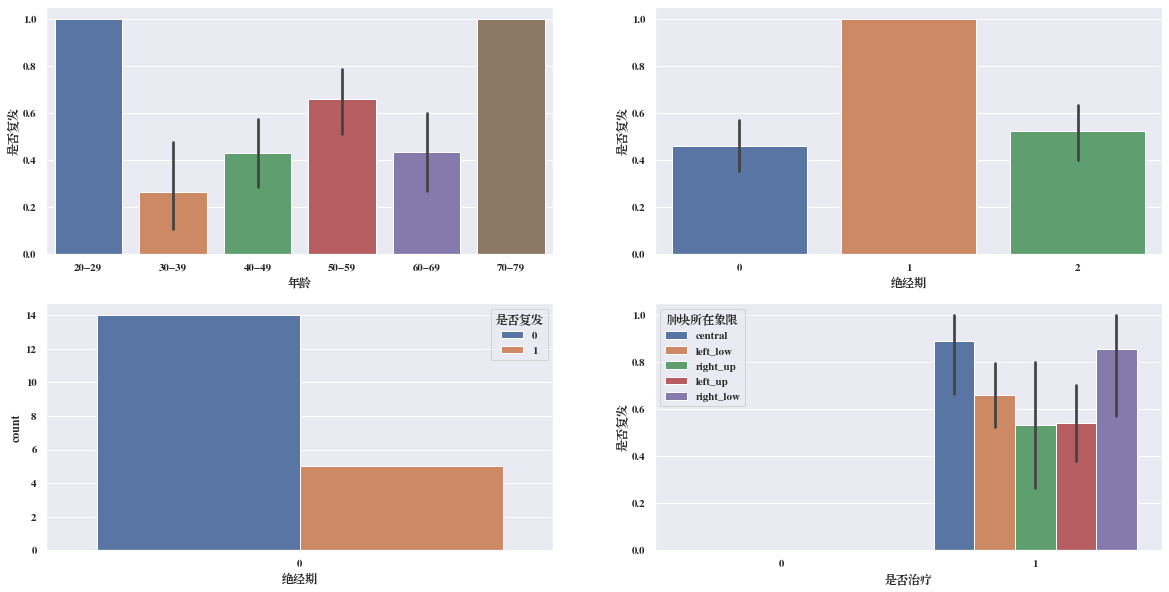

In [103]:
fig,axes = plt.subplots(2,2,figsize=(20,10))
sns.barplot(x='年龄',y='是否复发',data=cancer,ax=axes[0,0],order=["20-29","30-39","40-49","50-59","60-69","70-79"])
sns.barplot(x='绝经期',y='是否复发',data=cancer,ax=axes[0,1])
sns.countplot(x='绝经期',hue='是否复发',data=cancer[cancer.年龄.isin(['30-39'])],ax=axes[1,0])
sns.barplot(x='是否治疗',y='是否复发',hue='肿块所在象限',data=cancer,ax=axes[1,1])

<AxesSubplot:xlabel='肿瘤恶性程度', ylabel='是否复发'>

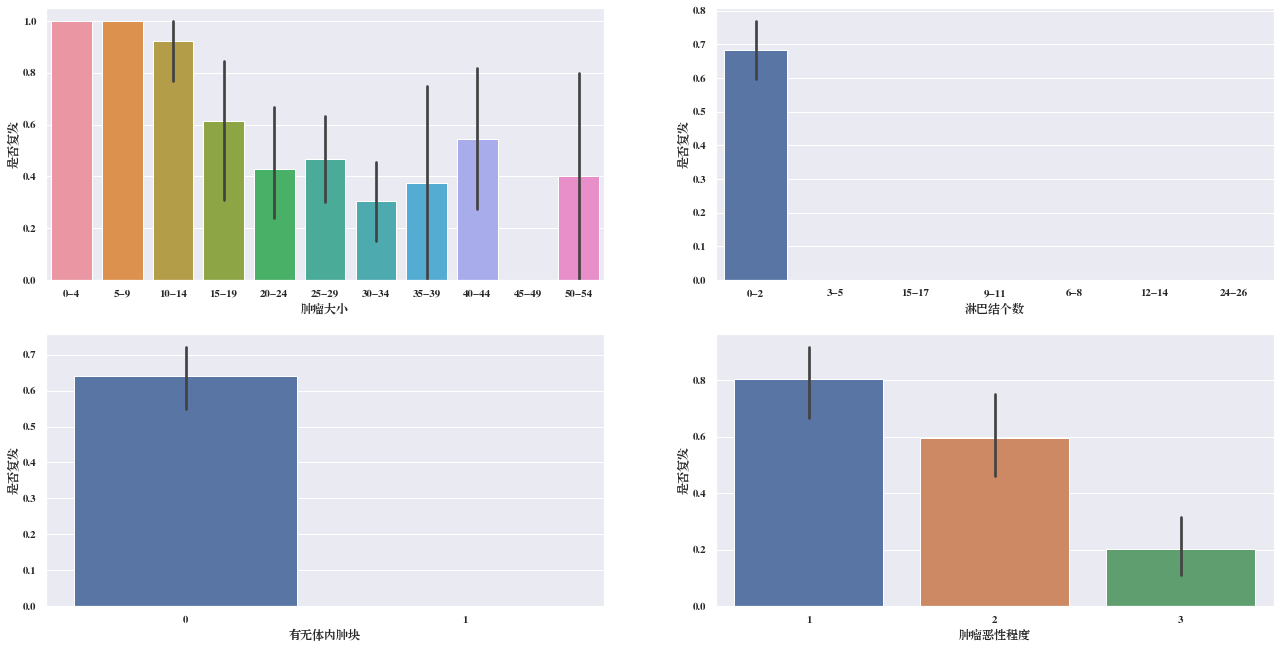

In [71]:
fig,axes = plt.subplots(2,2,figsize=(22,11))

sns.barplot(x='肿瘤大小',y='是否复发',data=cancer,order=['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54'], ax=axes[0,0])
# sns.barplot(x='肿瘤大小',y='是否复发',data=cancer,order=['0-2', '3-5', '6-8', '9-11','12-14'], ax=axes[0,0])
# sns.pairplot(x='tumor-size',y='class',data=cancer,order=['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54'], ax=axes[0,0])
sns.barplot(x='淋巴结个数',y='是否复发',data=cancer, ax=axes[0,1])
sns.barplot(x='有无体内肿块',y='是否复发',data=cancer, ax=axes[1,0])
sns.barplot(x='肿瘤恶性程度',y='是否复发',data=cancer,ax=axes[1,1])

TypeError: 'AxesSubplot' object is not subscriptable

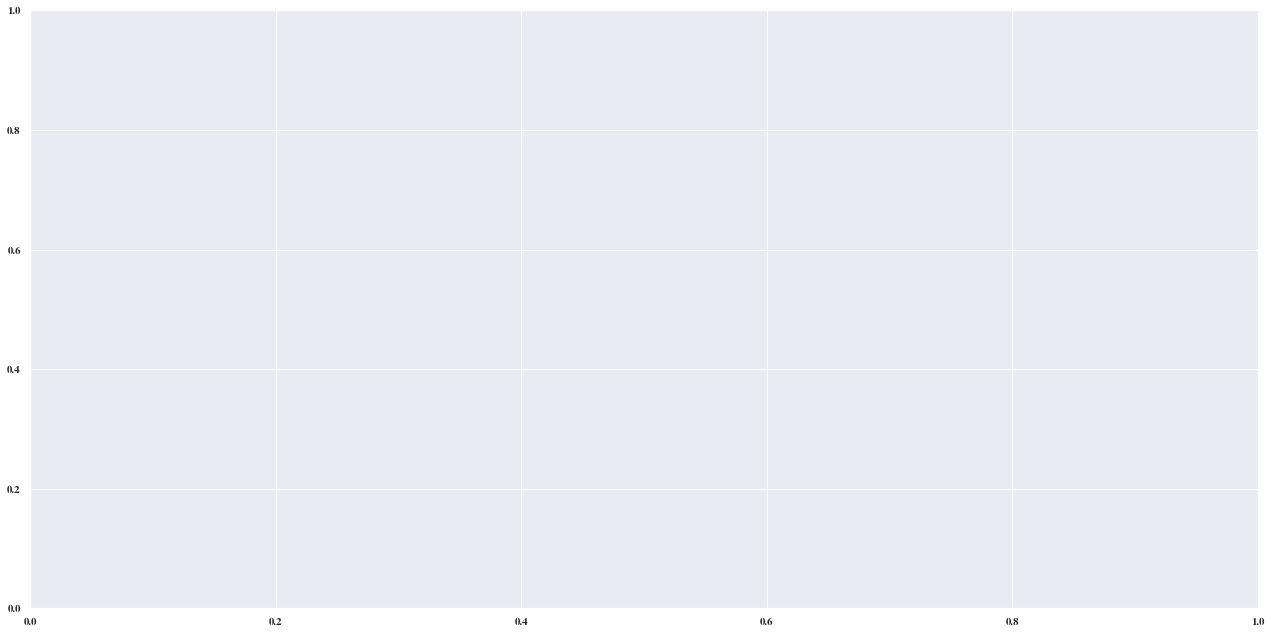

In [77]:
fig,axes = plt.subplots(1,1,figsize=(22,11))

sns.barplot(x='肿瘤大小',y='是否复发',data=cancer,order=['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54'], ax=axes[0,0])
# sns.barplot(x='肿瘤大小',y='是否复发',data=cancer,order=['0-2', '3-5', '6-8', '9-11','12-14'], ax=axes[0,0])
# sns.pairplot(x='tumor-size',y='class',data=cancer,order=['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54'], ax=axes[0,0])
# sns.barplot(x='淋巴结个数',y='是否复发',data=cancer, ax=axes[0,1])
# sns.barplot(x='有无体内肿块',y='是否复发',data=cancer, ax=axes[1,0])
sns.barplot(x='肿瘤恶性程度',y='是否复发',data=cancer,ax=axes[0,1])

<AxesSubplot:xlabel='肿瘤恶性程度', ylabel='是否复发'>

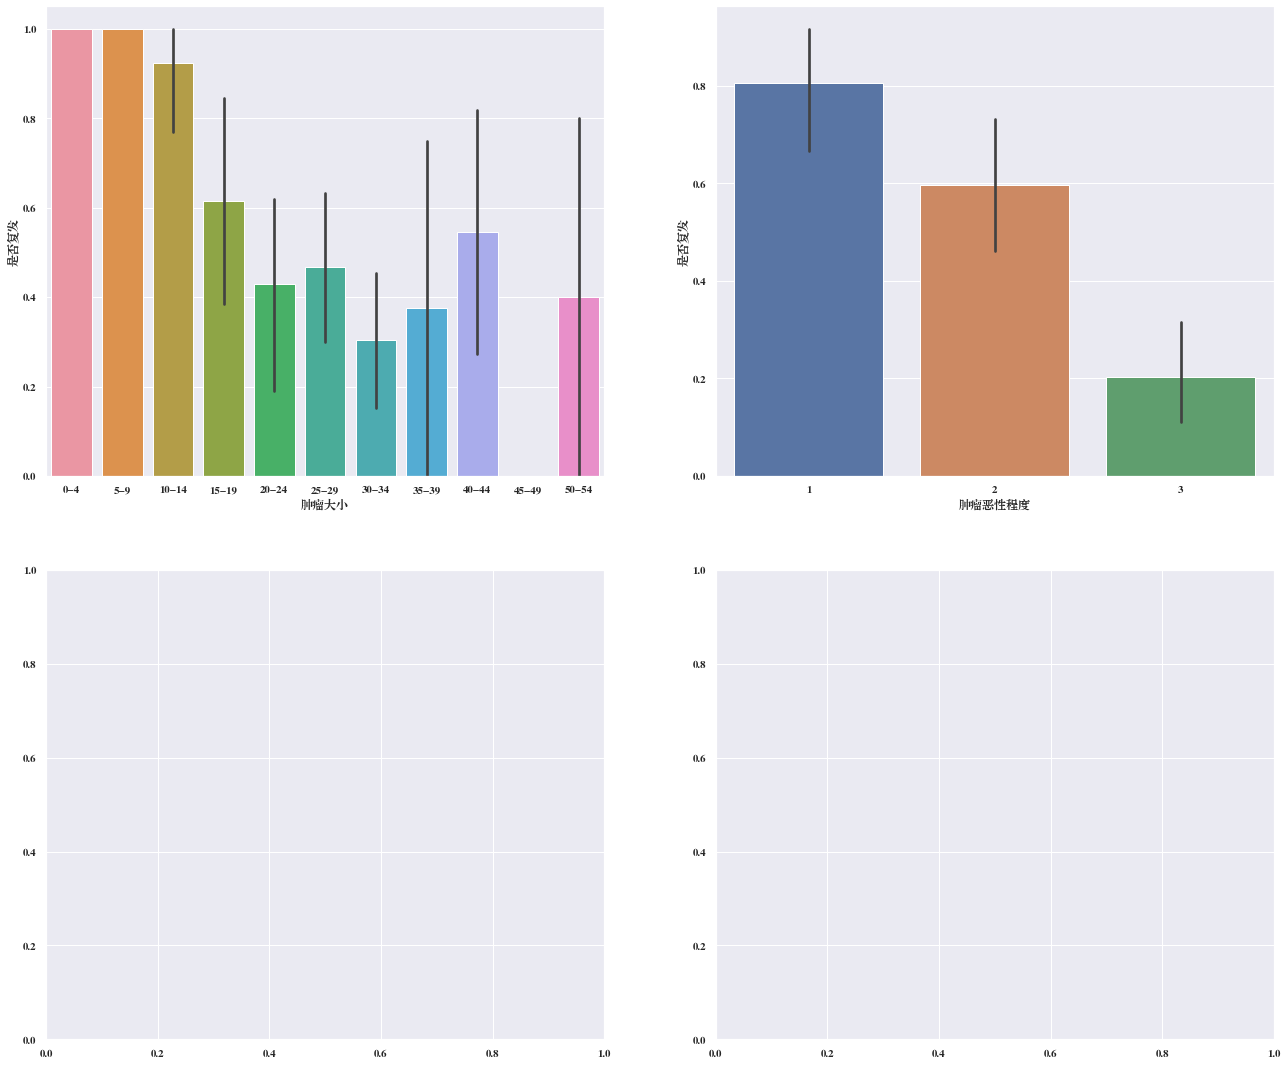

In [92]:
fig,axes = plt.subplots(2,2,figsize=(22,19))
sns.barplot(x='肿瘤大小',y='是否复发',data=cancer,order=['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54'],ax=axes[0,0])
sns.barplot(x='肿瘤恶性程度',y='是否复发',data=cancer,ax=axes[0,1])

In [105]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

features = ['年龄','肿瘤大小','淋巴结个数','肿块所在象限']
#print("encoding....")
for feature in features:  
    #非数字型和数字型标签值标准化
    le.fit(cancer[feature])
    cancer[feature] = le.transform(cancer[feature])
#print("over....")
cancer.head(100)

,是否复发,年龄,绝经期,肿瘤大小,淋巴结个数,有无体内肿块,肿瘤恶性程度,肿块所在象限,是否治疗
0,1,2,0,0,0,0,3,0,1
1,1,3,2,4,0,0,2,1,1
2,1,4,1,1,0,0,1,4,1
3,1,3,2,4,0,0,3,4,1
4,1,2,0,5,0,0,3,2,1
...,...,...,...,...,...,...,...,...,...
95,0,2,0,4,0,0,2,1,1
96,0,1,0,6,0,0,3,1,1
97,0,2,0,3,4,1,2,4,0
98,0,4,2,3,4,0,2,1,0


<AxesSubplot:>

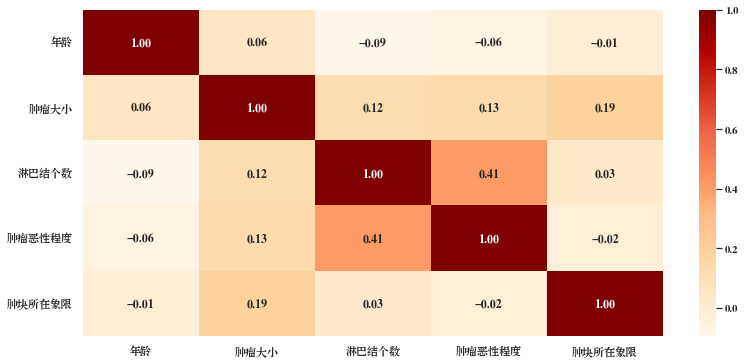

In [106]:
corr = cancer.corr()
plt.figure(figsize=(13, 6))

sns.heatmap(corr, annot=True, fmt = '.2f', cmap = 'OrRd')

In [109]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(cancer, test_size = 0.3)
print(train.shape)
print(test.shape)

(99, 9)
(43, 9)


In [111]:
train_x = train[train.columns[1:9]]
train_y = train['是否复发']
train_x

,年龄,绝经期,肿瘤大小,淋巴结个数,有无体内肿块,肿瘤恶性程度,肿块所在象限,是否治疗
24,3,2,1,0,0,1,2,1
37,3,0,4,0,0,1,2,1
74,2,2,3,0,0,2,2,1
77,4,2,5,0,0,3,0,1
39,2,0,3,0,0,1,1,1
...,...,...,...,...,...,...,...,...
1,3,2,4,0,0,2,1,1
104,1,0,2,5,1,3,1,0
61,2,0,4,0,0,2,2,1
123,4,2,3,3,1,3,1,0


<AxesSubplot:>

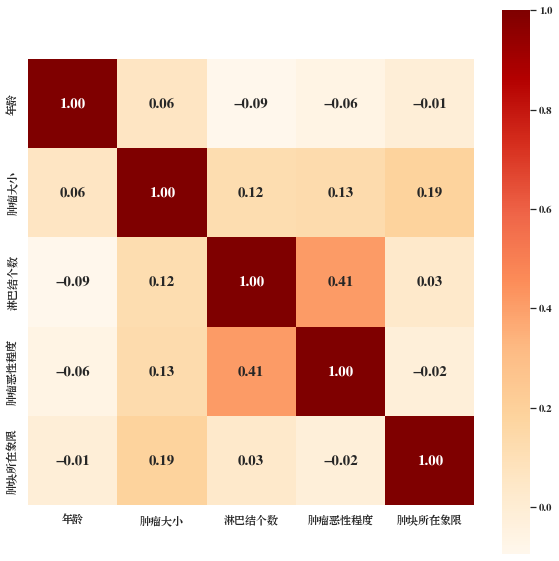

In [112]:
corr = cancer.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, cbar = True, square = True, annot=True, fmt = '.2f', annot_kws={'size': 15},
           cmap = 'OrRd')

In [113]:
# 极度随机树
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(train_x, train_y.astype(int))
clf.feature_importances_

array([0.12366158, 0.03220271, 0.16907629, 0.16328409, 0.08169439,
       0.13523479, 0.13242359, 0.16242256])

In [130]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(train_x, train_y.astype(int))
print('每个特征再模型中的重要程度分别为：{}'.format(clf.feature_importances_))

每个特征再模型中的重要程度分别为：[0.12076262 0.03322828 0.176661   0.16290386 0.08617925 0.12628318
 0.13077399 0.16320783]


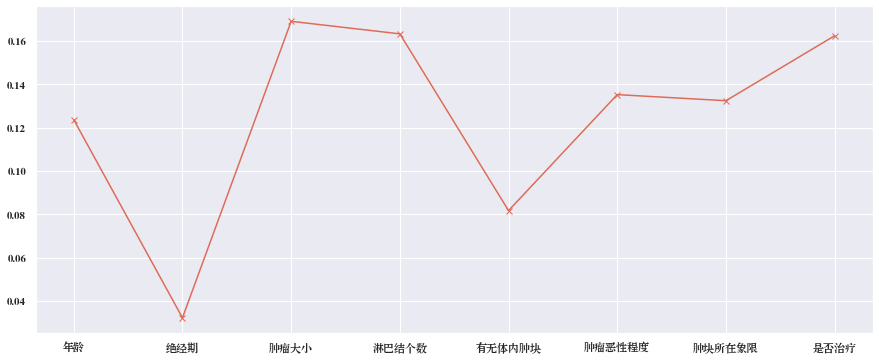

In [126]:
fig, axes = plt.subplots(1, 1, figsize=(15, 6))
# 折线图
axes.plot(train.columns[1:], clf.feature_importances_, linestyle = '-', color='#DE6B58', marker='x', linewidth=1.5)

In [120]:
fea_dict = [[f,s] for f,s in zip(train.columns[1:], clf.feature_importances_)]

In [121]:
fea_dict = sorted(fea_dict, key = lambda x: x[1], reverse=True)
fea_dict

[['肿瘤大小', 0.16907628824806675],
 ['淋巴结个数', 0.16328408649238954],
 ['是否治疗', 0.16242255808311568],
 ['肿瘤恶性程度', 0.13523478772164166],
 ['肿块所在象限', 0.13242359326955733],
 ['年龄', 0.12366157917615193],
 ['有无体内肿块', 0.08169439344386027],
 ['绝经期', 0.03220271356521687]]

# 选择上面大于0.02的作为最终特征2

In [122]:
prediction_var = [k for k ,v in fea_dict if v > 0.02 ]
prediction_var

['肿瘤大小', '淋巴结个数', '是否治疗', '肿瘤恶性程度', '肿块所在象限', '年龄', '有无体内肿块', '绝经期']

In [123]:
cancer.corr()

,年龄,肿瘤大小,淋巴结个数,肿瘤恶性程度,肿块所在象限
年龄,1.000000,0.060536,-0.094487,-0.060700,-0.011753
肿瘤大小,0.060536,1.000000,0.120293,0.127967,0.185125
淋巴结个数,-0.094487,0.120293,1.000000,0.410175,0.030944
肿瘤恶性程度,-0.060700,0.127967,0.410175,1.000000,-0.017700
肿块所在象限,-0.011753,0.185125,0.030944,-0.017700,1.000000


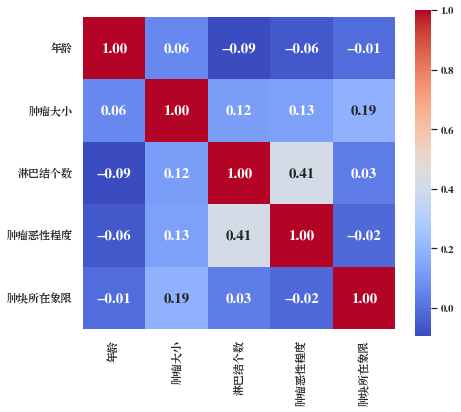

In [124]:
corr = cancer.corr()
plt.figure(figsize=(7, 6))
heatmap = sns.heatmap(corr, cbar = True, square = True, annot=True, fmt = '.2f', annot_kws={'size': 15},
           cmap = 'coolwarm')
heatmap = heatmap.get_figure()
heatmap.savefig('./image/heatmap')

<AxesSubplot:>

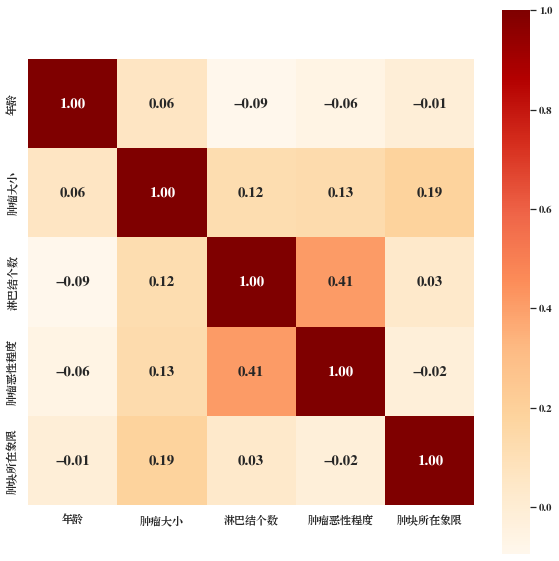

In [125]:
# corr = cancer[prediction_var].corr()
corr = cancer.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, cbar = True, square = True, annot=True, fmt = '.2f', annot_kws={'size': 15},
           cmap = 'OrRd')

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cancer[cancer.columns[1:]], cancer['类别'], test_size = 0.2, random_state=0)
print(train.shape)
print(test.shape)

(99, 9)
(43, 9)


In [50]:
# cancer.to_csv('初始化数据.csv', index = None)

In [46]:
# 用交叉验证法选择 随机森林回归 'n_estimators' 最优的参数
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV#网格授索
import time
rf = RandomForestClassifier(random_state = 10)
time1 = time.time()
param_1 ={'n_estimators':list(range(400, 1000, 100))}
model_1 = GridSearchCV(estimator = rf, param_grid = param_1, cv=5, n_jobs=-1)
model_1.fit(x_train,y_train.astype(int))
print("模型1-随机森林的最好的分数：{}".format(model_1.best_score_))
print("模型1-随机森林的最好的参数：\n{}".format(model_1.best_params_))
print("模型1-随机森林的消耗时间time=", (time.time()-time1)) #时间大概60
print("模型1-随机森林的测试集的分数：{}".format(model_1.score(x_test, y_test.astype(int))))

模型1-随机森林的最好的分数：0.8055335968379447
模型1-随机森林的最好的参数：
{'n_estimators': 800}
模型1-随机森林的消耗时间time= 2.2218852043151855
模型1-随机森林的测试集的分数：0.896551724137931


In [47]:
# 2. 决策树回归
from sklearn import tree
time1 = time.time()
param_2={'max_depth':list(range(10,100,10)),
         'min_samples_leaf':list(range(1,10))}
model_2=GridSearchCV(estimator = tree.DecisionTreeClassifier(
    random_state=10),param_grid = param_2, n_jobs=1, cv=5)
model_2.fit(x_train,y_train.astype(int))

print("模型2-决策树的最好的分数：{}".format(model_2.best_score_))
print("模型2-决策树的最好的参数：\n{}".format(model_2.best_params_))
print("模型2-决策树的消耗时间time=", (time.time()-time1)) #时间大概60
print("模型2-决策树的测试集的分数：{}".format(model_2.score(x_test, y_test.astype(int))))

模型2-决策树的最好的分数：0.8059288537549406
模型2-决策树的最好的参数：
{'max_depth': 10, 'min_samples_leaf': 9}
模型2-决策树的消耗时间time= 0.6044700145721436
模型2-决策树的测试集的分数：0.7931034482758621


In [52]:
# 3.KNN回归
from sklearn import neighbors
time1 = time.time()
param_3={'n_neighbors':[i for i in range(1,11)], 'p':[i for i in range(1,6)]} 
model_3=GridSearchCV(estimator = neighbors.KNeighborsClassifier(), param_grid = param_3, n_jobs=-1, cv=5)
model_3.fit(x_train,y_train.astype(int))
print("模型3-KNN的最好的分数：{}".format(model_3.best_score_))
print("模型3-kNN的最好的参数：{}".format(model_3.best_params_))
print("模型3-kNN的消耗时间time=", (time.time()-time1)) #时间大概60
print("模型3-kNN的测试集的分数：{}".format(model_3.score(x_test, y_test.astype(int))))

模型3-KNN的最好的分数：0.742687747035573
模型3-kNN的最好的参数：{'n_neighbors': 3, 'p': 1}
模型3-kNN的消耗时间time= 0.2116541862487793
模型3-kNN的测试集的分数：0.7931034482758621


In [48]:
# 4.逻辑回归
from sklearn.linear_model import LogisticRegression
time1 = time.time()
param_4={'C':[1, 2, 4], 'penalty':['l1', 'l2']}
model_4=GridSearchCV(estimator = LogisticRegression(), param_grid = param_4, n_jobs=1, cv=5)
model_4.fit(x_train,y_train.astype(int))
print("模型4-逻辑回归的最好的分数：{}".format(model_4.best_score_))
print("模型4-逻辑回归的最好的参数：{}".format(model_4.best_params_))
print("模型4-逻辑回归的消耗时间time=", (time.time()-time1)) #时间大概60
print("模型4-逻辑回归的测试集的分数：{}".format(model_4.score(x_test, y_test.astype(int))))

模型4-逻辑回归的最好的分数：0.8047430830039526
模型4-逻辑回归的最好的参数：{'C': 1, 'penalty': 'l2'}
模型4-逻辑回归的消耗时间time= 0.1054692268371582
模型4-逻辑回归的测试集的分数：0.896551724137931


/opt/anaconda3/envs/torch1.12/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/torch1.12/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/torch1.12/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/envs/torch1.12/lib/python3.10/site-packages/sklearn/linear_model/_log

In [49]:
# 5. 梯度提升
from sklearn.ensemble import GradientBoostingClassifier
time1 = time.time()
param_5 = {'n_estimators':list(range(100, 600, 50))}
model_5 = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = param_5, n_jobs=-1, cv=5)
model_5.fit(x_train,y_train.astype(int))
print("模型5-梯度提升树的最好的分数：{}".format(model_5.best_score_))
print("模型5-梯度提升树的最好的参数：{}".format(model_5.best_params_))
print("模型5-梯度提升树的消耗时间time=", (time.time()-time1)) #时间大概60
print("模型5-梯度提升树的测试集的分数：{}".format(model_5.score(x_test, y_test.astype(int))))

模型5-梯度提升树的最好的分数：0.7968379446640317
模型5-梯度提升树的最好的参数：{'n_estimators': 100}
模型5-梯度提升树的消耗时间time= 0.7432770729064941
模型5-梯度提升树的测试集的分数：0.9310344827586207


In [53]:
# 6. SVC
from sklearn.svm import SVC
time1 = time.time()
param_6={'gamma':np.linspace(0, 0.001, 100)}
model_6=GridSearchCV(estimator = SVC(kernel = 'rbf'), param_grid = param_6, n_jobs=-1,cv=5)
model_6.fit(x_train,y_train.astype(int))
print("模型6-SVC的最好的分数：{}".format(model_6.best_score_))
print("模型6-SVC的最好的参数：{}".format(model_6.best_params_))
print("模型6-SVC的消耗时间time=", (time.time()-time1)) #时间大概60
print("模型6-SVC的测试集的分数：{}".format(model_6.score(x_test, y_test.astype(int))))

模型6-SVC的最好的分数：0.6988142292490119
模型6-SVC的最好的参数：{'gamma': 0.0009393939393939394}
模型6-SVC的消耗时间time= 0.318767786026001
模型6-SVC的测试集的分数：0.8620689655172413


/opt/anaconda3/envs/torch1.12/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/torch1.12/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/torch1.12/lib/python3.10/site-packages/sklearn/svm/_base.py", line 237, in fit
    raise ValueError(msg)
ValueError: gamma value must be > 0; 0.0 is invalid. Use a positive number or use 'auto' to set gamma to a value of 1 / n_features.

  warnings.wa

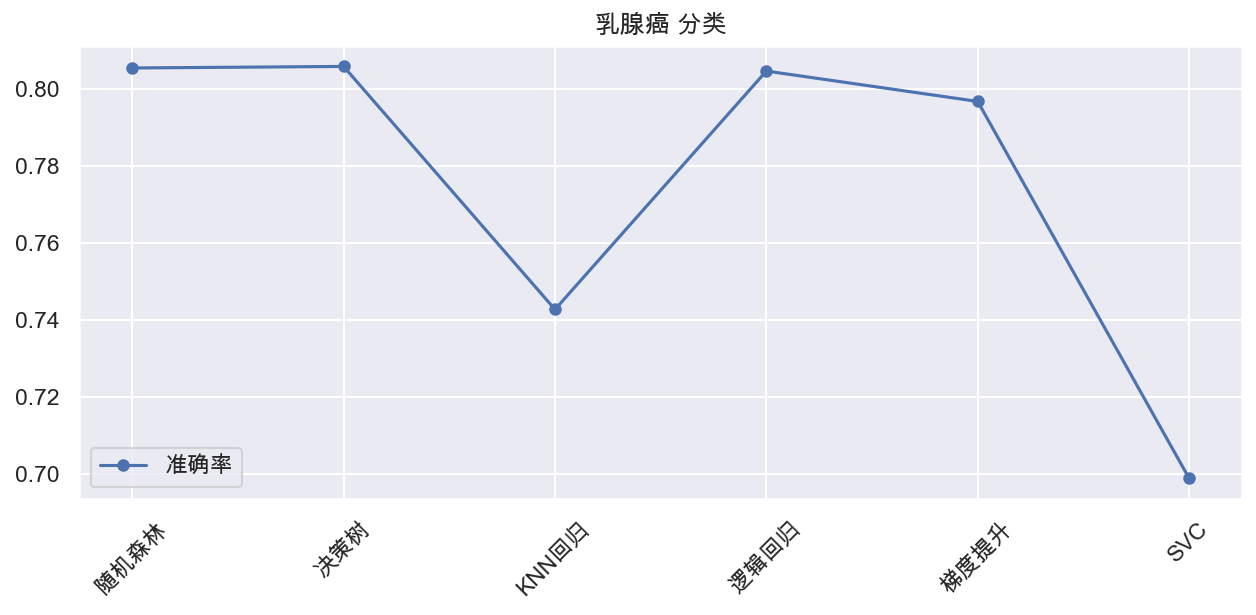

In [54]:
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.rcParams['font. sans-serif'] = ['SimHei'] #用黑体显示中文
plt.rcParams["font.family"] = 'Arial Unicode MS'
plt.rcParams['figure.figsize']=(10.0, 4.0)
plt.rcParams['savefig.dpi']= 150 #图片像素
plt.rcParams['figure.dpi']= 150 #分辦率
# 默认的像素：16.0,4.0]，分辦率为100，图片尺寸为 6005400
# 指定dpi=200，图片尺寸为 1200*800
# 指定dpi=300，图片尺寸为 1800*1200
# 设置figsize可以在不改变分辦率情况下改变比例

x = ['随机森林', '决策树', 'KNN回归', '逻辑回归', '梯度提升', 'SVC',]
y1 = [model_1.best_score_, model_2.best_score_, model_3.best_score_,
      model_4.best_score_, model_5.best_score_, model_6.best_score_,]
y1 = [round(item, 4) for item in y1]
plt.plot(x, y1, marker='o', ms=5, label= "准确率")
     
plt.xticks(rotation=45)

plt.title("乳腺癌 分类")
plt.legend(loc="lower left")
plt.savefig("./data/乳腺癌分类.jpg")
plt.show()